###Project- Part A: Airbnb Price Prediction and Insights
####1. Overview
Airbnb provides a platform for property owners to rent out their spaces to travelers. Pricing a
listing effectively is critical for maximizing revenue while staying competitive in the market.
For hosts, understanding what factors influence the price of their listings is essential.
This project aims to build a machine learning model to predict the price of Airbnb listings
based on various features such as property type, room type, location, amenities, and host
characteristics. By analyzing these factors, this project will provide actionable insights to
Airbnb hosts to optimize their listing prices.
####2. Problem Statement
The primary objective of this project is to develop a regression model that predicts the price
of an Airbnb listing. Using features such as property type, room type, number of reviews,
location, and amenities, the model will aim to estimate the price accurately.
The insights derived from this analysis will help Airbnb hosts understand the key drivers of
price, enabling them to make data-driven decisions for pricing their properties. Additionally,
the project will help Airbnb refine its recommendations for pricing to improve host and guest
satisfaction.
####3. Dataset Information
Dataset: [Airbnb_data]('https://docs.google.com/spreadsheets/d/1N7P0euUjfjB8XXdTBQeicjGjxAOm18wvCRLaQC92a8g/edit?gid=693059640#gid=693059640')

In [ ]:
# import important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load dataset
url = 'https://docs.google.com/spreadsheets/d/1N7P0euUjfjB8XXdTBQeicjGjxAOm18wvCRLaQC92a8g/export?format=csv&gid=693059640'
df = pd.read_csv(url)
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
# Dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
# summary of statistics
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [ ]:
print("Duplicate Values:", df.duplicated().sum())
print("Missing Values:")
print(df.isnull().sum())

Duplicate Values: 0
Missing Values:
id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


In [ ]:
# Removing unnecessary variable
df = df.drop(columns=['id','name','thumbnail_url','zipcode','description'])

In [ ]:
# numeric columns
num_col = df.dtypes[df.dtypes!= 'object'].index
num_col

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'beds'],
      dtype='object')

In [ ]:
# Categorical columns
cat_col = df.dtypes[df.dtypes=='object'].index
cat_col

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'neighbourhood'],
      dtype='object')

In [ ]:
for col in num_col:
  print(f'{col} \n{"-"*30}')
  print(df[col].unique())
  print(f'\n {"x"*40}')

log_price 
------------------------------
[5.01063529 5.12989872 4.97673374 6.62007321 4.74493213 4.44265126
 4.41884061 4.78749174 3.58351894 4.60517019 4.24849524 5.29831737
 4.95582706 4.09434456 4.31748811 4.59511985 4.88280192 4.38202663
 3.68887945 4.90527478 4.00733319 6.95654544 5.00394631 4.55387689
 5.19295685 4.65396035 3.8286414  5.22035583 4.48863637 4.35670883
 4.82831374 3.912023   4.68213123 5.52146092 4.99721227 5.78382518
 3.55534806 4.15888308 4.75359019 4.77912349 4.94875989 5.85793315
 6.90775528 6.2146081  4.70048037 4.49980967 5.5174529  4.69134788
 3.80666249 5.16478597 5.24702407 4.57471098 4.8598124  5.08759633
 3.87120101 5.56068163 5.39362755 4.80402104 4.92725369 4.17438727
 6.1717006  6.55108033 5.29330482 4.06044301 5.6347896  6.10924758
 5.9375362  4.86753445 5.0689042  4.12713438 4.46590812 3.4657359
 4.96284463 5.59842196 3.49650756 3.40119738 5.6167711  4.93447393
 3.8918203  7.15070146 6.74523635 4.34380542 6.52795792 5.54126354
 5.08140437 2.9444389

In [ ]:
df[num_col].isnull().sum()

,0
log_price,0
accommodates,0
bathrooms,200
cleaning_fee,0
latitude,0
longitude,0
number_of_reviews,0
review_scores_rating,16722
bedrooms,91
beds,131


In [ ]:
# check for bathrooms
df[pd.isnull(df['bathrooms'])]

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
33,4.488636,House,Private room,"{Internet,""Wireless Internet"",Kitchen,""Pets li...",1,NaN,Real Bed,moderate,True,LA,...,01-04-2011,f,16-11-2016,34.086338,-118.364778,West Hollywood,46,99.0,1.0,1.0
38,4.744932,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",Kitchen,""Pets al...",2,NaN,Real Bed,strict,True,NYC,...,06-01-2011,f,26-07-2015,40.731311,-73.986092,East Village,2,100.0,1.0,1.0
378,4.605170,Apartment,Private room,{},1,NaN,Real Bed,flexible,False,NYC,...,22-12-2012,f,NaN,40.685423,-73.907321,Bushwick,0,NaN,1.0,NaN
644,4.488636,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",1,NaN,Real Bed,strict,True,NYC,...,22-03-2011,f,13-09-2017,40.720288,-73.997312,Little Italy,93,96.0,1.0,1.0
1351,5.164786,Apartment,Entire home/apt,{},2,NaN,Real Bed,strict,True,NYC,...,14-12-2012,f,30-03-2016,40.761937,-73.993456,Hell's Kitchen,33,92.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72631,5.521461,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,NaN,Real Bed,strict,True,NYC,...,17-11-2010,f,14-09-2017,40.722131,-73.992357,Lower East Side,71,98.0,1.0,1.0
73040,4.595120,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,NaN,Real Bed,strict,True,DC,...,06-07-2011,f,05-05-2017,38.914632,-77.017953,LeDroit Park,51,92.0,1.0,1.0
73362,4.248495,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",1,NaN,Real Bed,strict,True,NYC,...,21-05-2014,f,12-10-2015,40.659810,-73.959703,Lefferts Garden,13,97.0,1.0,NaN
73377,4.465908,House,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Hea...",4,NaN,Real Bed,strict,True,NYC,...,07-03-2013,f,25-09-2017,40.762908,-73.918715,Astoria,135,91.0,1.0,2.0


For missing numeric columns like beds, bathrooms, bedrooms and review scores rating i fill with median value.

In [ ]:
# filling missing values for numeric column using median
for col in num_col:
  df[col].fillna(df[col].median(),inplace=True)

df[num_col].isnull().sum()

,0
log_price,0
accommodates,0
bathrooms,0
cleaning_fee,0
latitude,0
longitude,0
number_of_reviews,0
review_scores_rating,0
bedrooms,0
beds,0


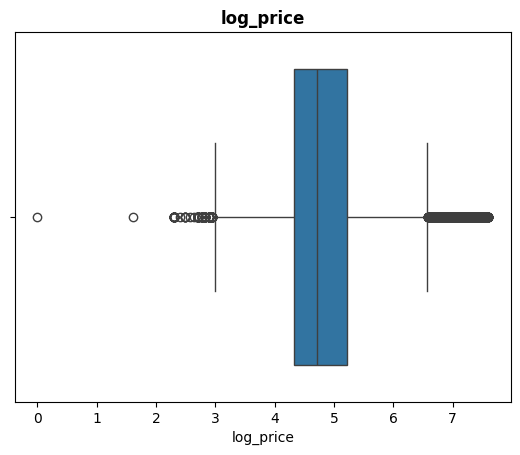

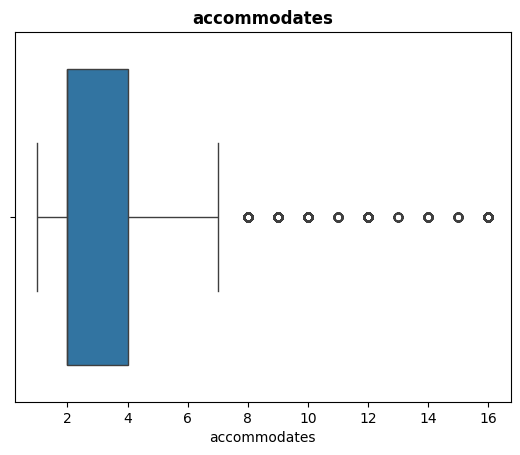

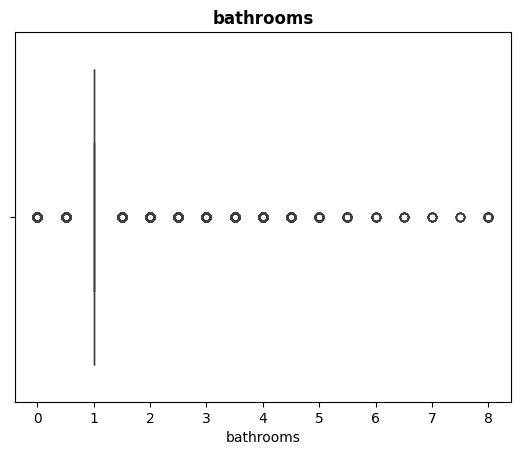

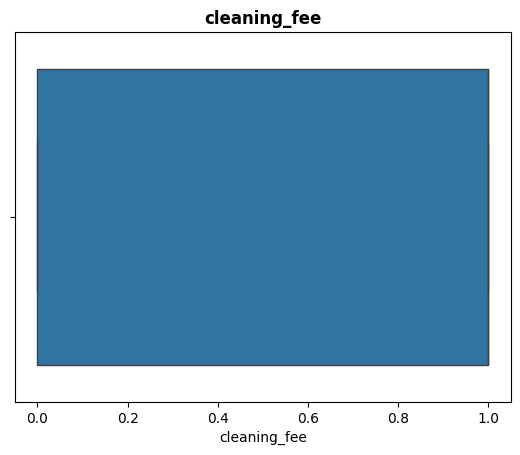

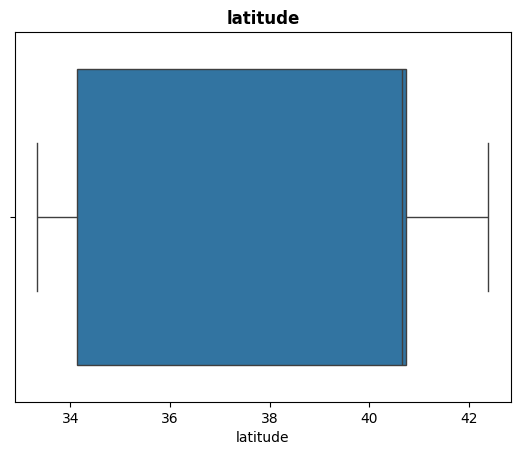

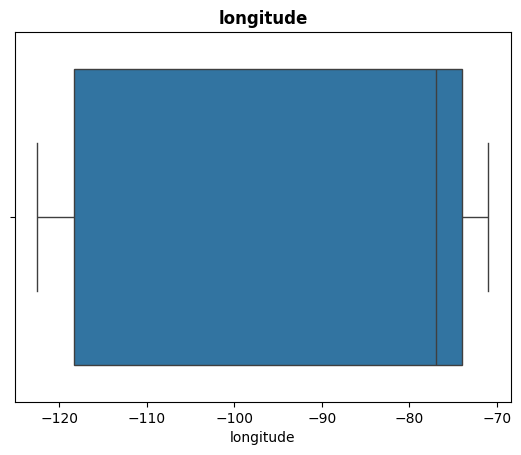

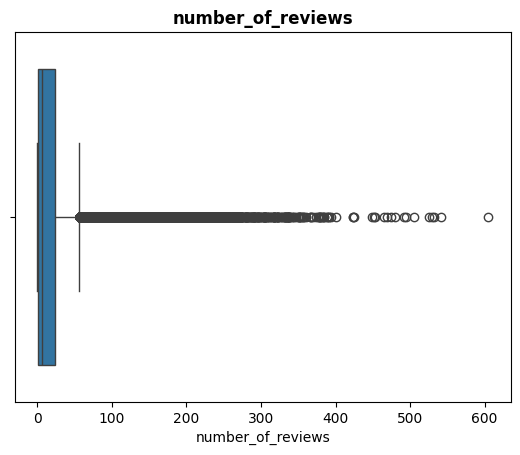

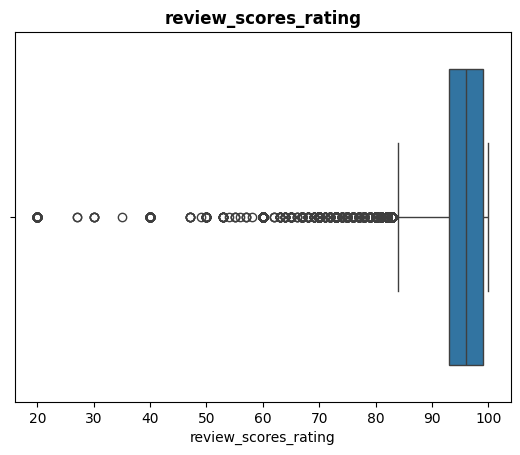

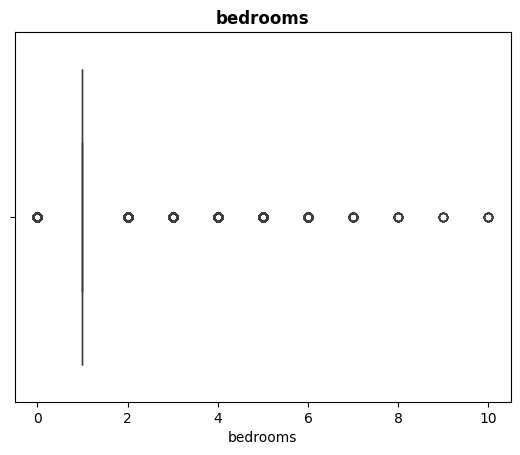

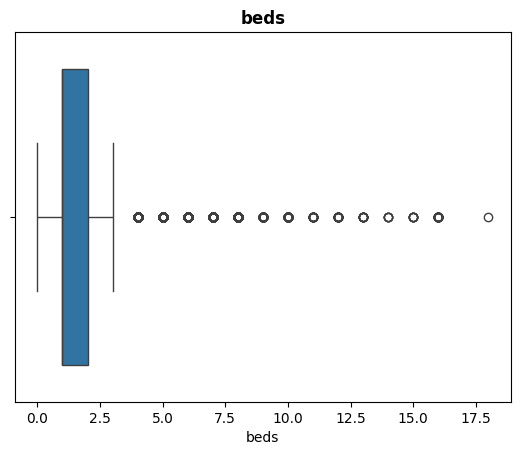

In [ ]:
# create box plot for numeric columns
for i in num_col:
  sns.boxplot(x=df[i])
  plt.title(i,fontweight='bold')
  plt.show()

##### Outliars
* Log price columns have outliars.
* latitude and longitude have no outliers.
* bathrooms, bedrooms, beds and accomadation: These are discrete numeric features with a limited number of meaningful values (e.g., 1, 2, 3). Applying outlier capping could distort their real-world significance (e.g., reducing 5 bathrooms to 2 would misrepresent a luxury listing).
* number of reviews and review scores rating have outliers.

In [ ]:
colsforoutliers = ['log_price', 'number_of_reviews', 'review_scores_rating']

In [ ]:
def iqr_capping(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1
  lower = (Q1 - 1.5 * IQR)
  upper = (Q3 + 1.5 * IQR)
  return x.clip(lower, upper)

df[colsforoutliers] = df[colsforoutliers].apply(iqr_capping)

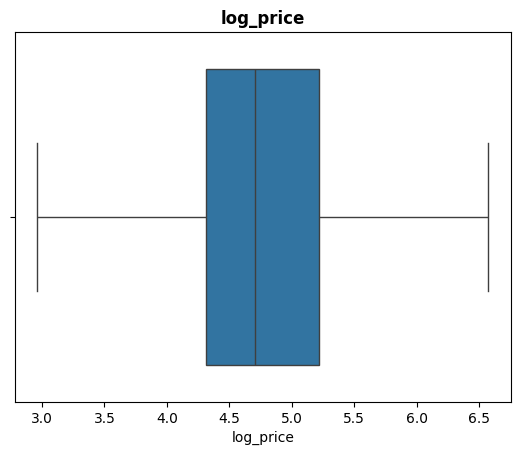

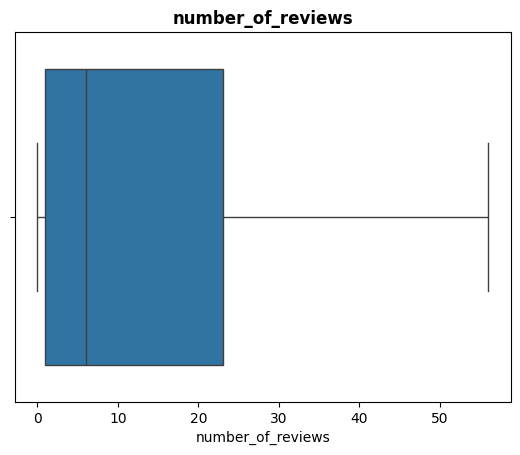

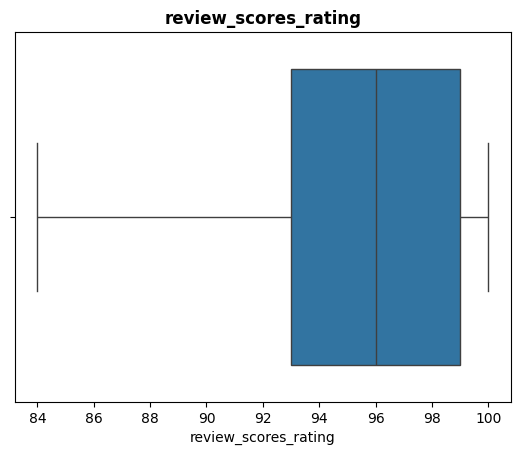

In [ ]:
for i in colsforoutliers:
  sns.boxplot(x=df[i])
  plt.title(i,fontweight='bold')
  plt.show()

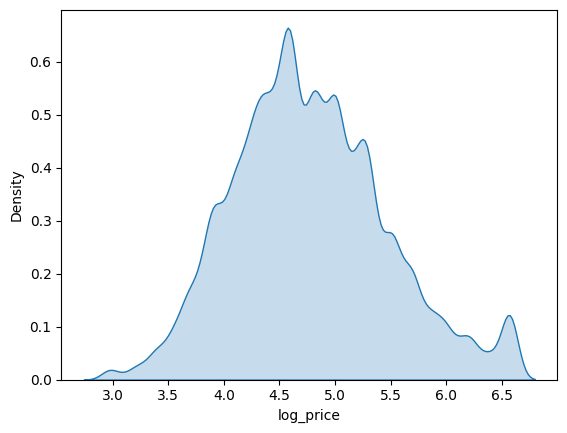

In [ ]:
sns.kdeplot(x=df['log_price'], fill = True)
plt.show()

categorical columns

In [ ]:
df[cat_col].isnull().sum()

,0
property_type,0
room_type,0
amenities,0
bed_type,0
cancellation_policy,0
city,0
first_review,15864
host_has_profile_pic,188
host_identity_verified,188
host_response_rate,18299


In [ ]:
for col in cat_col:
  print(f'{col} \n{"-"*30}')
  print(df[col].value_counts())
  print(f'\n{"x"*40}')

property_type 
------------------------------
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Casa particular           1
Parking Space             1
Lighthouse      

#### Handling Dates variables and Creating a New Feature

In [ ]:
date_cols = ['first_review', 'last_review', 'host_since']
df[date_cols] = df[date_cols].apply(pd.to_datetime, dayfirst=True)

In [ ]:
# Fill missing values using forward fill
df['first_review'].ffill(inplace=True)
df['last_review'].ffill(inplace=True)
# filling with median because 188 is missing
df['host_since'].fillna(df['host_since'].median(),inplace=True)

In [ ]:
today = pd.to_datetime("today")
date_cols = {
    'first_review':'day_since_first_review',
    'last_review': 'day_since_last_review',
    'host_since': 'host_duration'
}
# Calculate days since for all date columns
for col, new_col in date_cols.items():
  df[new_col] = (today - df[col]).dt.days

# Drop original date columns
df.drop(columns=date_cols.keys(),inplace=True)

In [ ]:
# fill the host has profile pic and host identity verified with f
df['host_has_profile_pic'].fillna('f', inplace = True)
df['host_identity_verified'].fillna('f', inplace = True)

# fill host response rate with 0%
df['host_response_rate'].fillna('0%', inplace=True)
# fill neighbourhodd with mode its categorical variable
df['neighbourhood'].fillna(df['neighbourhood'].mode()[0], inplace=True)
df.isnull().sum()

,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,0
bed_type,0
cancellation_policy,0
cleaning_fee,0
city,0


In [ ]:
# Remove '%' and convert to float
df['host_response_rate'] = df['host_response_rate'].str.replace("%",'').astype(float)/100

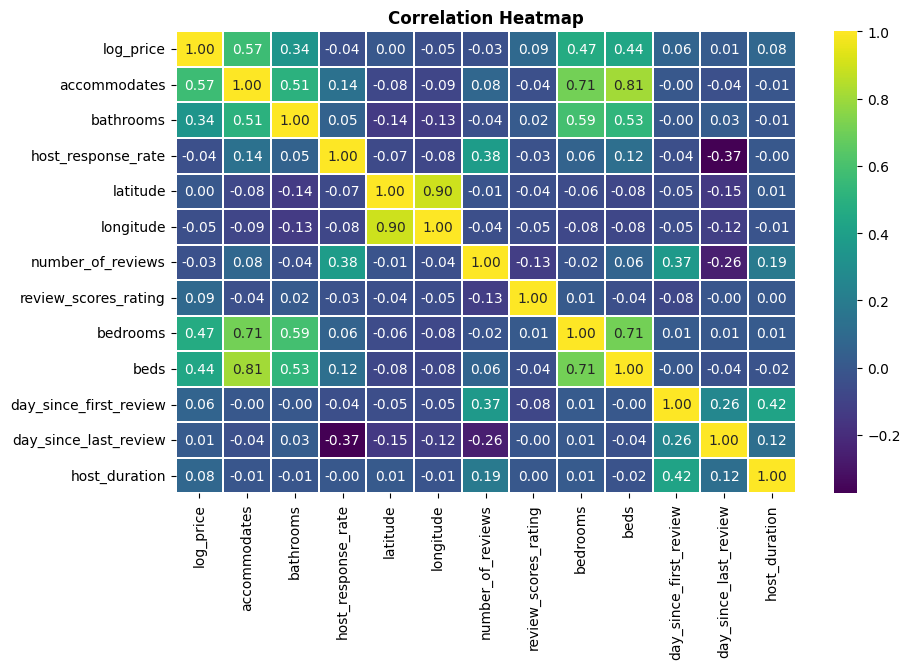

In [ ]:
# create heat map
number_col = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[number_col].corr(), annot =True, fmt='.2f',linewidths=0.3, cmap='viridis')
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()

There is clear multicollinearity, especially among latitude,longitude accommodates, bathrooms, bedrooms, and beds.

In [ ]:
df.drop(columns=['beds','accommodates','bathrooms','latitude'], inplace=True)

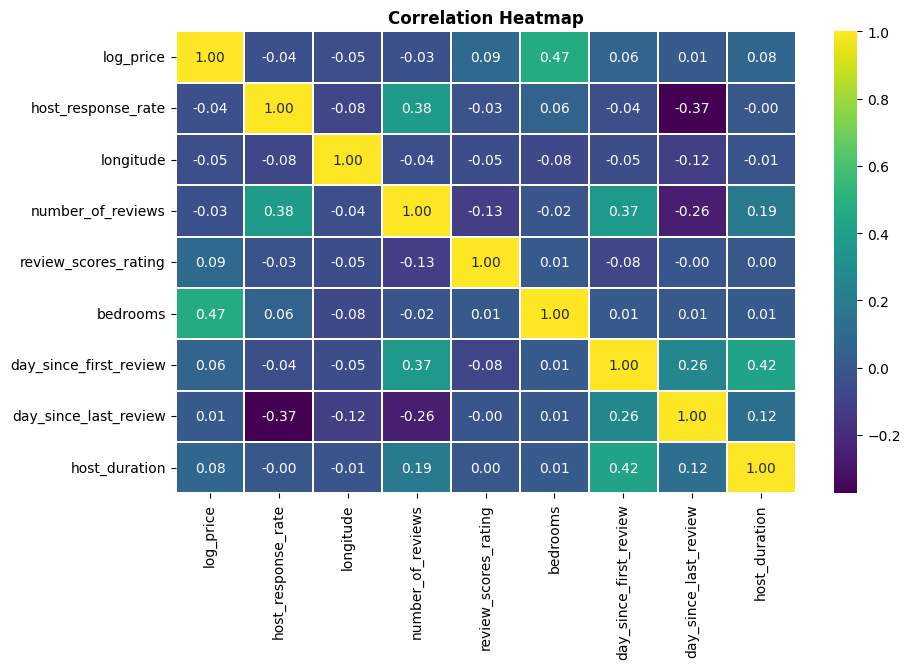

In [ ]:
# create heat map
number_col = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[number_col].corr(), annot =True, fmt='.2f',linewidths=0.3, cmap='viridis')
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()

In [ ]:
# Standardize Boolean Columns
# These contain values like 't', 'f', True, False
bool_map = {'t':1, 'f':0, True:1, False:0}
df['cleaning_fee'] = df['cleaning_fee'].map(bool_map)
df['host_has_profile_pic'] = df['host_has_profile_pic'].map(bool_map)
df['host_identity_verified'] = df['host_identity_verified'].map(bool_map)
df['instant_bookable'] = df['instant_bookable'].map(bool_map)

In [ ]:
# apply ONE-HOT ENCODE LOW-CARDINALITY CATEGORICAL VARIABLES
df = pd.get_dummies(df, columns=['property_type', 'room_type', 'bed_type',
    'cancellation_policy', 'city'], drop_first= True)

In [ ]:
df['neighbourhood'].value_counts()

,count
neighbourhood,
Williamsburg,9734
Bedford-Stuyvesant,2166
Bushwick,1601
Upper West Side,1396
Mid-Wilshire,1392
...,...
Todt Hill,1
"Suitland-Silver Hill, MD",1
Irwindale,1


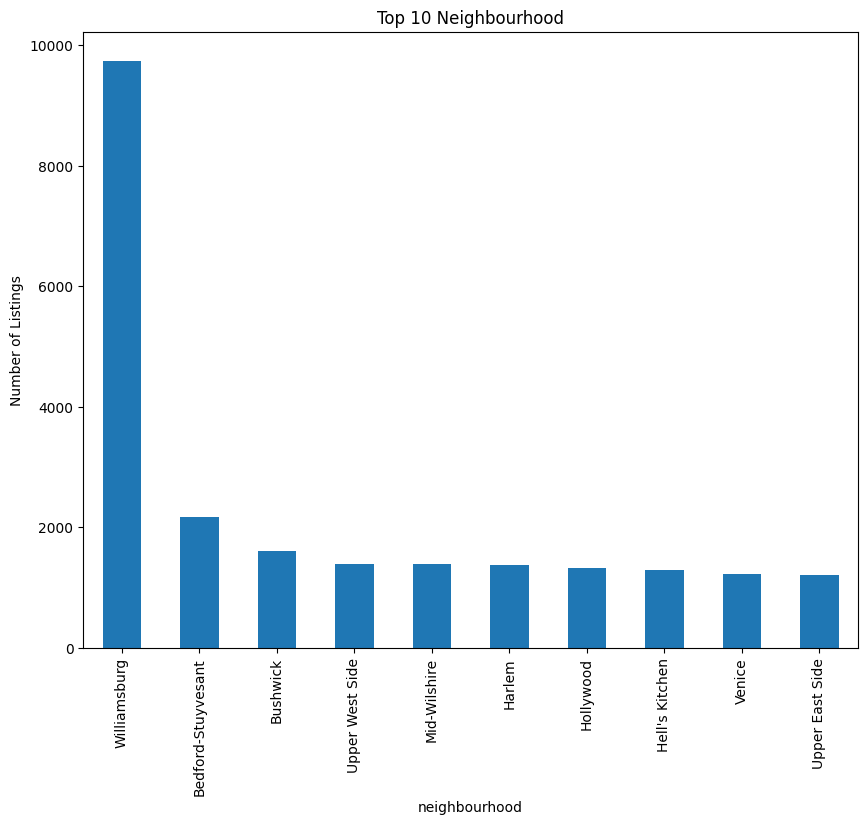

In [ ]:
# Neighborhood popularity
plt.figure(figsize=(10,8))
df['neighbourhood'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Neighbourhood')
plt.ylabel('Number of Listings')
plt.show()

In [ ]:
# Neighbourhood have 619 categogry (or unique values)
top_neigh = df['neighbourhood'].value_counts().nlargest(10).index
df['neighbourhood_top'] = df['neighbourhood'].apply(lambda x: x if x in top_neigh else 'other')
# One-hot encode
df = pd.get_dummies(df,columns=['neighbourhood_top'], drop_first = True)
df.drop(columns=['neighbourhood'], inplace=True)

In [ ]:
df['amenities'][0]

'{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'

In [ ]:
# Remove spaces and translation missing tag
df['amenities_clean'] = df['amenities'].str.replace('translation missing: en.hosting_amenity_50','')
df['amenities_clean'] = df['amenities_clean'].str.replace('[{}"]','', regex=True)
df['amenities_clean'] = df['amenities_clean'].str.split(',')
df.drop(columns=['amenities'],inplace=True)

In [ ]:
df['amenities_clean'][0]

['Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Heating',
 'Family/kid friendly',
 'Essentials',
 'Hair dryer',
 'Iron',
 '']

In [ ]:
from collections import Counter

all_amenities = sum(df['amenities_clean'], [])
top_amenities = [amenity.strip() for amenity, count in Counter(all_amenities).most_common(10)]
print(top_amenities)

['Wireless Internet', 'Kitchen', 'Heating', 'Essentials', 'Smoke detector', 'Air conditioning', 'TV', 'Shampoo', 'Hangers', 'Carbon monoxide detector']


In [ ]:
# Create binary columns for top amenities
for amenity in top_amenities:
    df[f'amenity_{amenity}'] = df['amenities_clean'].apply(lambda x: int(amenity in x))

# Drop original amenities columns
df.drop(columns=['amenities_clean'], inplace=True)

In [ ]:
X = df.drop(columns=['log_price'])
y = df['log_price']

# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the new split sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (59288, 81)
Test set size: (14823, 81)


In [ ]:
# Define a function to train, predict, and evaluate a model

def evaluate_model(model,X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"{model.__class__.__name__}")
  print(f"MAE: {mae:.2f}")
  print(f"MSE: {mse:.2f}")
  print(f"RMSE: {np.sqrt(mse):.2f}")
  print(f"R2: {r2:.2f}")
  print("\n")

In [ ]:
models = {
    LinearRegression(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    XGBRegressor()
}

for model in models:
  evaluate_model(model, X_train, X_test, y_train, y_test)

AdaBoostRegressor
MAE: 0.39
MSE: 0.25
RMSE: 0.50
R2: 0.47


BaggingRegressor
MAE: 0.32
MSE: 0.18
RMSE: 0.42
R2: 0.63


RandomForestRegressor
MAE: 0.30
MSE: 0.17
RMSE: 0.41
R2: 0.66


DecisionTreeRegressor
MAE: 0.43
MSE: 0.33
RMSE: 0.58
R2: 0.31


LinearRegression
MAE: 0.34
MSE: 0.20
RMSE: 0.45
R2: 0.59


XGBRegressor
MAE: 0.30
MSE: 0.16
RMSE: 0.40
R2: 0.66


KNeighborsRegressor
MAE: 0.58
MSE: 0.55
RMSE: 0.74
R2: -0.13




XGBRegressor, RandomForestRegressor and BaggingRegressor these are performing better.

#### Scaling the numeric variables

In [ ]:
# scaling these numeric columns
scale_cols = [
    'cleaning_fee',
    'host_response_rate',
    'longitude',
    'number_of_reviews',
    'review_scores_rating',
    'bedrooms',
    'day_since_first_review',
    'day_since_last_review',
    'host_duration'
]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
scaler = StandardScaler()

X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols] = scaler.fit_transform(X_test[scale_cols])

In [ ]:
# Define a function to train, predict, and evaluate a model

def evaluate_model(model,X_train_scaled, X_test_scaled, y_train, y_test):
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  mae = mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"{model.__class__.__name__}")
  print(f"MAE: {mae:.2f}")
  print(f"MSE: {mse:.2f}")
  print(f"RMSE: {np.sqrt(mse):.2f}")
  print(f"R2: {r2:.2f}")
  print("\n")

In [ ]:
for model in models:
  evaluate_model(model,X_train_scaled, X_test_scaled, y_train, y_test)

AdaBoostRegressor
MAE: 0.39
MSE: 0.25
RMSE: 0.50
R2: 0.48


BaggingRegressor
MAE: 0.41
MSE: 0.29
RMSE: 0.53
R2: 0.41


RandomForestRegressor
MAE: 0.40
MSE: 0.26
RMSE: 0.51
R2: 0.45


DecisionTreeRegressor
MAE: 0.52
MSE: 0.46
RMSE: 0.68
R2: 0.05


LinearRegression
MAE: 0.38
MSE: 0.25
RMSE: 0.50
R2: 0.47


XGBRegressor
MAE: 0.42
MSE: 0.30
RMSE: 0.54
R2: 0.39


KNeighborsRegressor
MAE: 0.38
MSE: 0.25
RMSE: 0.50
R2: 0.49




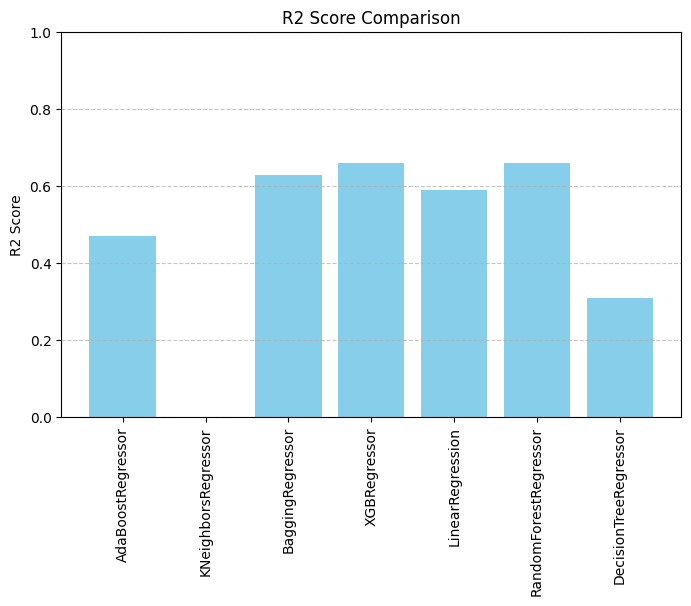

In [ ]:
# without scaling graph of r2_score
models = ['AdaBoostRegressor','KNeighborsRegressor', 'BaggingRegressor','XGBRegressor','LinearRegression','RandomForestRegressor','DecisionTreeRegressor']
r2_score = [0.47, -0.13,0.63,0.66, 0.59,0.66,0.31]

plt.figure(figsize=(8, 5))
plt.bar(models, r2_score, color='skyblue')
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

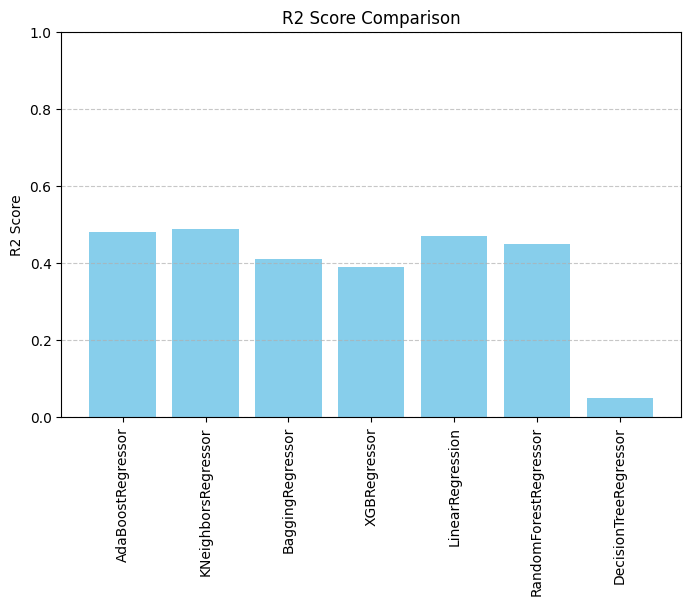

In [ ]:
# with scaling graph of r2_score
models = ['AdaBoostRegressor','KNeighborsRegressor', 'BaggingRegressor','XGBRegressor','LinearRegression','RandomForestRegressor','DecisionTreeRegressor']
r2_score = [0.48, 0.49,0.41,0.39, 0.47,0.45,0.05]

plt.figure(figsize=(8, 5))
plt.bar(models, r2_score, color='skyblue')
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

#### Tree based model not need scaling because they split data based on feature thresholds.
* Linear Regression also slightly worse
* We have lots of one-hot encoded columns (booleans).
* Scaling shifts importance from real-valued features.
* LinearRegression often benefits from scaling—but not always drastically
* KNeighborsRegressor: Went from R2 -0.13 → 0.49. That's a huge jump.
* Because KNN is distance-based, and scaling is crucial for it.